<a href="https://colab.research.google.com/github/annefrancine/Deep-Learning-Models-/blob/master/Recurrent_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Google Stock Price: 2012 to 2017

# Importing packages

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Connecting Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Importing Dataset

In [0]:
Google_Stock_Price_Train = '/content/drive/My Drive/curso deep learning-udemy/Notebooks/5.RNN/Google_Stock_Price_Train.csv'
Google_Stock_Price_Test = '/content/drive/My Drive/curso deep learning-udemy/Notebooks/5.RNN/Google_Stock_Price_Test.csv'

In [4]:
dataset_train = pd.read_csv(Google_Stock_Price_Train)
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [0]:
training_set = dataset_train.iloc[:, 1:2].values # fazer a previsão a partir do valor de abertura


# Data normalisation

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Data structures with 60 ranges

In [0]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Adjust the format

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


# RNA

In [0]:
#Initializing RNA
regressor = Sequential()
# creating layers 
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [12]:
#Compile
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
#training
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0379
Epoch 2/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0066
Epoch 3/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0059
Epoch 4/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0053
Epoch 5/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0049
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0046
Epoch 7/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0044
Epoch 8/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0041
Epoch 9/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0039
Epoch 10/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0042
Epoch 11/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0046
Epoch 12/100
1198/1198 [==============================] - 5s 4ms/step - lo

# Dataset test

In [0]:
dataset_test = pd.read_csv(Google_Stock_Price_Test)
real_stock_price = dataset_test.iloc[:, 1:2].values

In [0]:
# getting predicted data
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

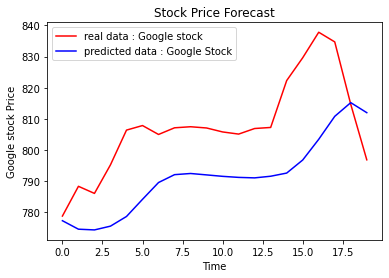

In [16]:
#V Dataviz 
plt.plot(real_stock_price, color = 'red', label = 'real data : Google stock ')
plt.plot(predicted_stock_price, color = 'blue', label = 'predicted data : Google Stock')
plt.title('Stock Price Forecast')
plt.xlabel('Time')
plt.ylabel('Google stock Price')
plt.legend()
plt.show()